In [1]:
import pandas as pd
import numpy as np
import torch

from sdv.single_table import TVAESynthesizer, CTGANSynthesizer
from sdv.metadata import Metadata  

from bikebench.benchmarking.public_benchmarking_utils import Benchmarker, get_unconditionally_valid_sample, get_conditionally_valid_sample, ScoreReportDashboard

/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cpu"

def get_metadata(data: pd.DataFrame) -> pd.DataFrame:
    metadata = Metadata.detect_from_dataframe(
        data=data,
        table_name='bike_bench_data'
    )
    return metadata

### CTGAN

In [3]:
bench_CTGAN = Benchmarker(device=device, masked_constraints=False, gradient_free=True)
data = bench_CTGAN.get_train_data(categorical=True)
metadata = get_metadata(data)

In [4]:
# CTGAN = CTGANSynthesizer(metadata, verbose=True, epochs=500)
# CTGAN.fit(data)

In [5]:
# CTGAN.save("results/models/CTGAN.pkl")

In [6]:
CTGAN = CTGANSynthesizer.load(filepath="results/models/CTGAN.pkl")
synthetic_collapsed = CTGAN.sample(num_rows=1000000)
synthetic_cont = bench_CTGAN.convert_df_to_continuous(synthetic_collapsed)
CTGAN_tens = torch.tensor(synthetic_cont.values, dtype=torch.float32)

generated_data = get_unconditionally_valid_sample(bench_CTGAN, CTGAN_tens)

main_scores_CTGAN, detailed_scores_CTGAN, all_evaluation_scores_CTGAN = bench_CTGAN.score(generated_data)

bench_CTGAN.save_results("results/benchmark_results/CTGAN_conditional")

print(main_scores_CTGAN)

/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(
100%|██████████| 100/100 [00:08<00:00, 11.24it/s]


Design Quality ↑ (HV)      0.014795
Constraint Violation ↓        0.318
Sim. to Data ↓ (MMD)       0.082142
Novelty ↑                 10.350362
Binary Validity ↑             0.682
Diversity ↓ (DPP)         11.927788
Evaluation Count          1000000.0
Conditional?                   True
Masked Constraints?           False
Gradient Free?                 True
dtype: object


In [7]:
bench_CTGAN_masked = Benchmarker(device=device, masked_constraints=True, gradient_free=True)
generated_data = get_unconditionally_valid_sample(bench_CTGAN_masked, CTGAN_tens)
main_scores_CTGAN_masked, detailed_scores_CTGAN_masked, all_evaluation_scores_CTGAN_masked = bench_CTGAN_masked.score(generated_data)
bench_CTGAN_masked.save_results("results/benchmark_results/CTGAN_masked_conditional")

print(main_scores_CTGAN_masked)

100%|██████████| 100/100 [00:07<00:00, 12.96it/s]

Design Quality ↑ (HV)      0.010917
Constraint Violation ↓       1.3013
Sim. to Data ↓ (MMD)       0.098243
Novelty ↑                 11.663548
Binary Validity ↑            0.3013
Diversity ↓ (DPP)         11.650462
Evaluation Count          1000000.0
Conditional?                   True
Masked Constraints?            True
Gradient Free?                 True
dtype: object


### TVAE

In [8]:
bench_TVAE = Benchmarker(device=device, masked_constraints=False, gradient_free=True)

In [9]:
# TVAE = TVAESynthesizer(metadata, verbose=True, epochs=500)
# TVAE.fit(data)

In [10]:
# TVAE.save("results/models/TVAE.pkl")

In [11]:
TVAE = TVAESynthesizer.load(filepath="results/models/TVAE.pkl")
synthetic_collapsed = TVAE.sample(num_rows=1000000)
synthetic_cont = bench_TVAE.convert_df_to_continuous(synthetic_collapsed)
TVAE_tens = torch.tensor(synthetic_cont.values, dtype=torch.float32)
generated_data = get_unconditionally_valid_sample(bench_TVAE, TVAE_tens)
main_scores_TVAE, detailed_scores_TVAE, all_evaluation_scores_TVAE = bench_TVAE.score(generated_data)

bench_TVAE.save_results("results/benchmark_results/TVAE_conditional")

print(main_scores_TVAE)

/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(
100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


Design Quality ↑ (HV)      0.016111
Constraint Violation ↓        0.053
Sim. to Data ↓ (MMD)       0.153323
Novelty ↑                  6.699757
Binary Validity ↑             0.947
Diversity ↓ (DPP)         13.550609
Evaluation Count          1000000.0
Conditional?                   True
Masked Constraints?           False
Gradient Free?                 True
dtype: object


In [12]:
bench_TVAE_masked = Benchmarker(device=device, masked_constraints=True, gradient_free=True)
generated_data = get_unconditionally_valid_sample(bench_TVAE_masked, TVAE_tens)
main_scores_TVAE_masked, detailed_scores_TVAE_masked, all_evaluation_scores_TVAE_masked = bench_TVAE_masked.score(generated_data)
bench_TVAE_masked.save_results("results/benchmark_results/TVAE_masked_conditional")

print(main_scores_TVAE_masked)

100%|██████████| 100/100 [00:08<00:00, 11.82it/s]

Design Quality ↑ (HV)      0.015065
Constraint Violation ↓       0.4279
Sim. to Data ↓ (MMD)       0.153665
Novelty ↑                   6.63034
Binary Validity ↑            0.7251
Diversity ↓ (DPP)         13.542912
Evaluation Count          1000000.0
Conditional?                   True
Masked Constraints?            True
Gradient Free?                 True
dtype: object


### Compare Performance

We can specify filepaths instead of raw scores for convenience, provided that the results are saved in the standard format

/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/benchmarking/public_benchmarking_utils.py:284: UserWarning: Dataset: results directory missing (results/benchmark_results/baseline_dataset_conditional), skipping.
  warnings.warn(f"{name}: results directory missing ({d}), skipping.")
/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/benchmarking/public_benchmarking_utils.py:284: UserWarning: Dataset masked: results directory missing (results/benchmark_results/baseline_dataset_masked_conditional), skipping.
  warnings.warn(f"{name}: results directory missing ({d}), skipping.")
/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/benchmarking/public_benchmarking_utils.py:383: UserWarning: No model_colors provided; using Matplotlib cycle.
  warnings.warn("No model_colors provided; using Matplotlib cycle.")


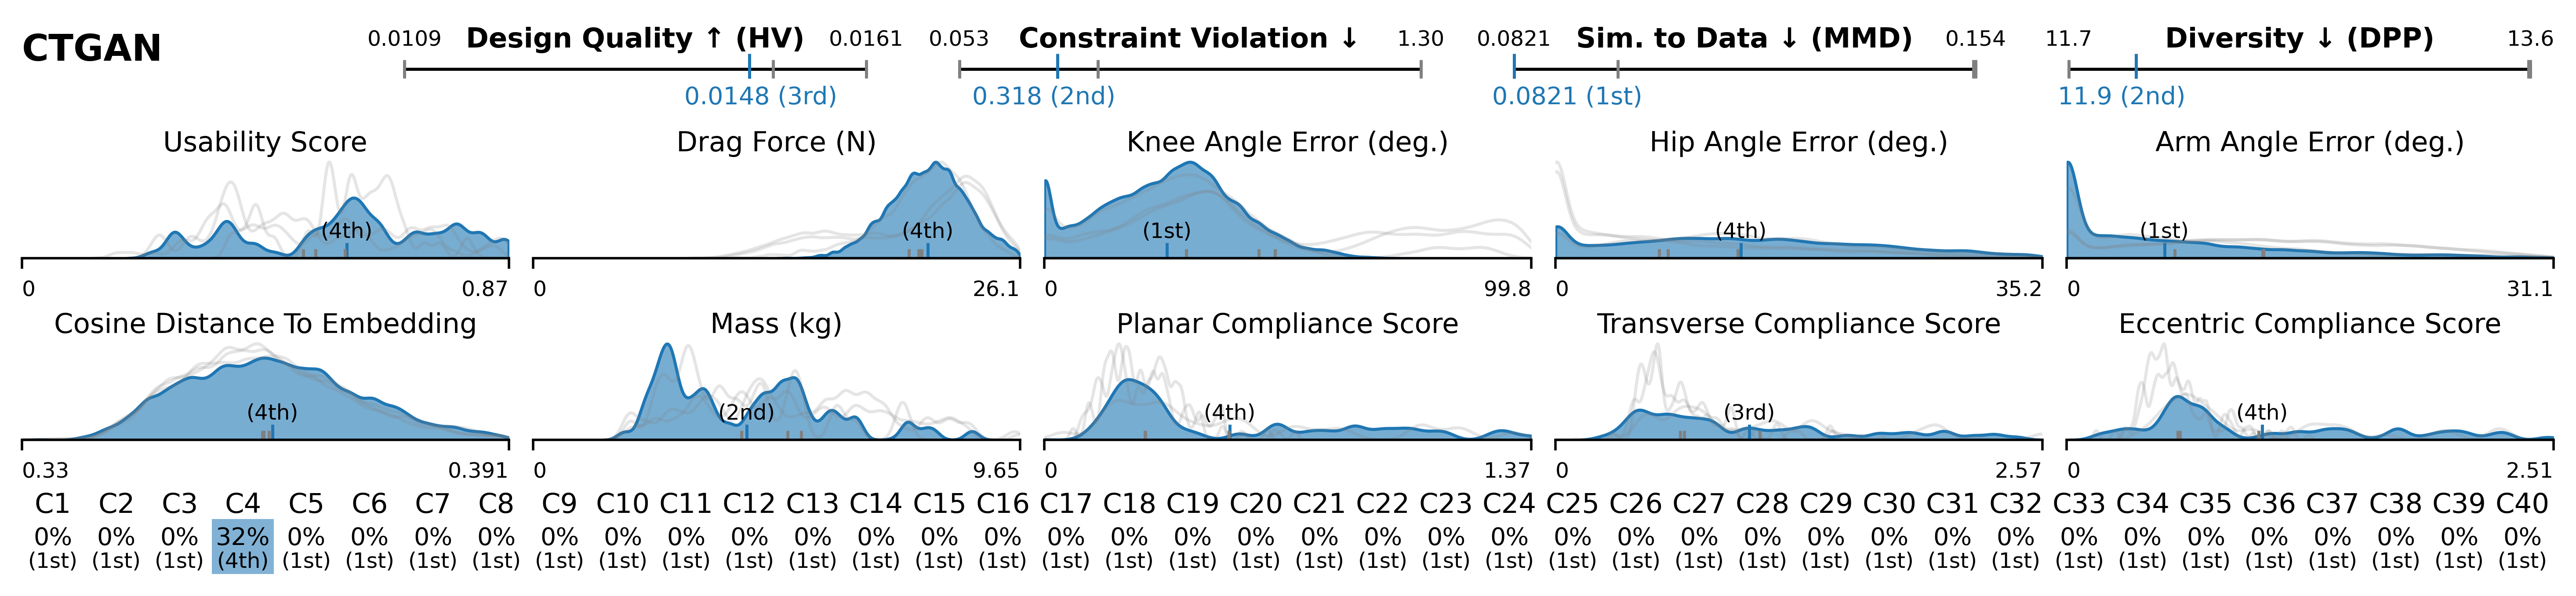

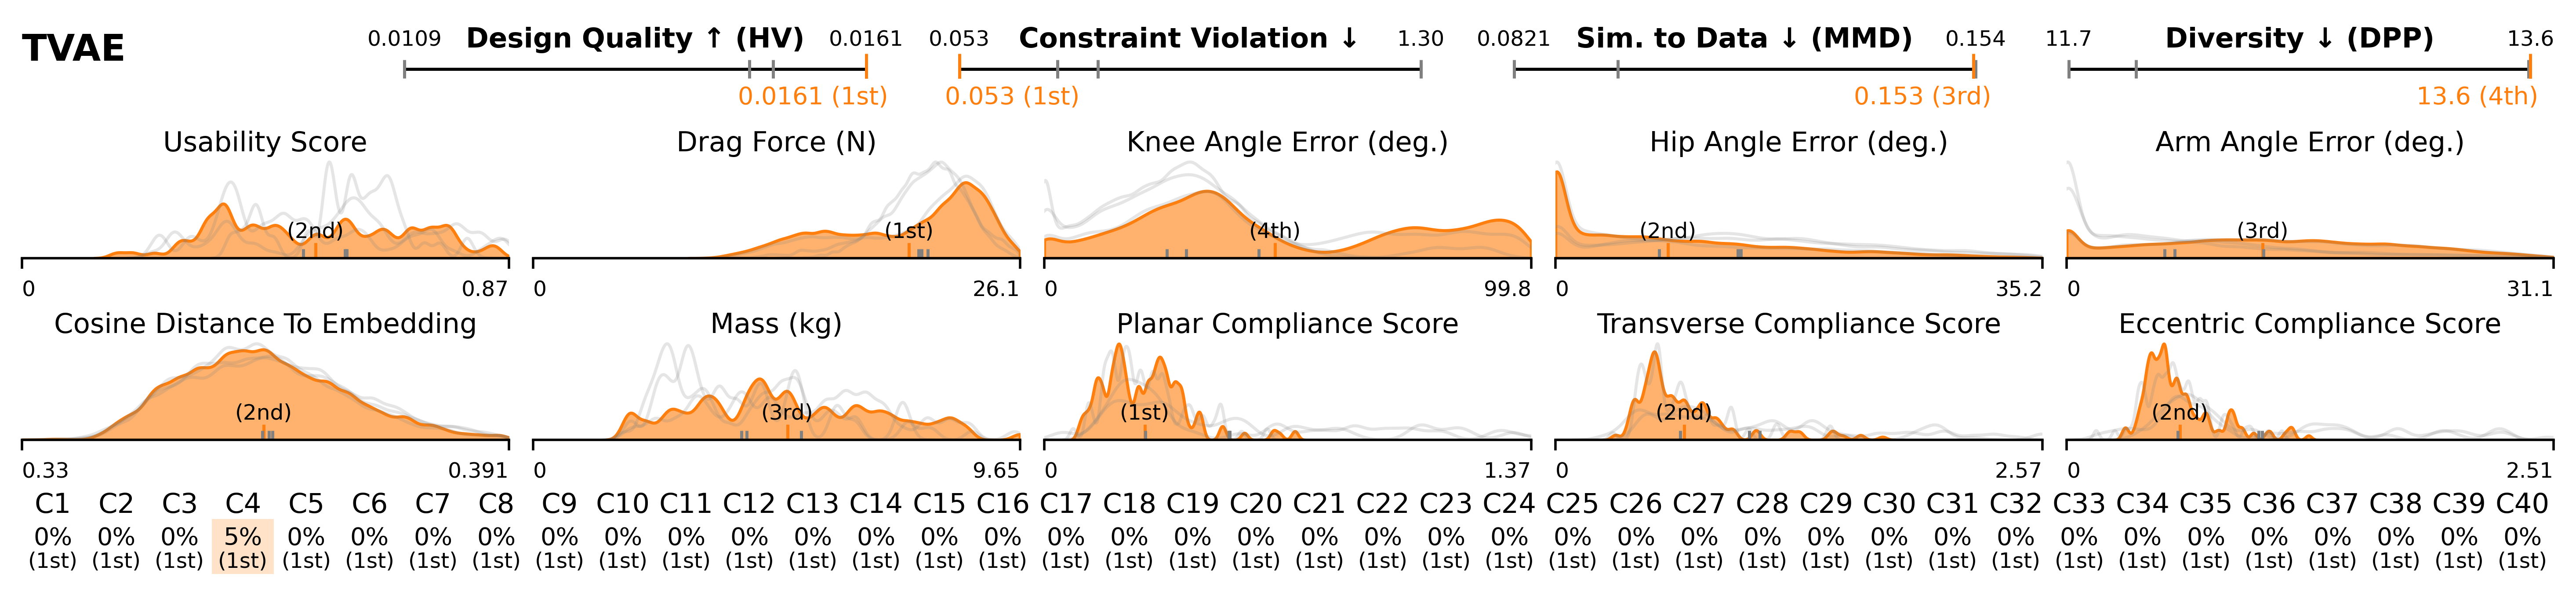

Model 'Dataset' not found in dashboard data. Skipping.


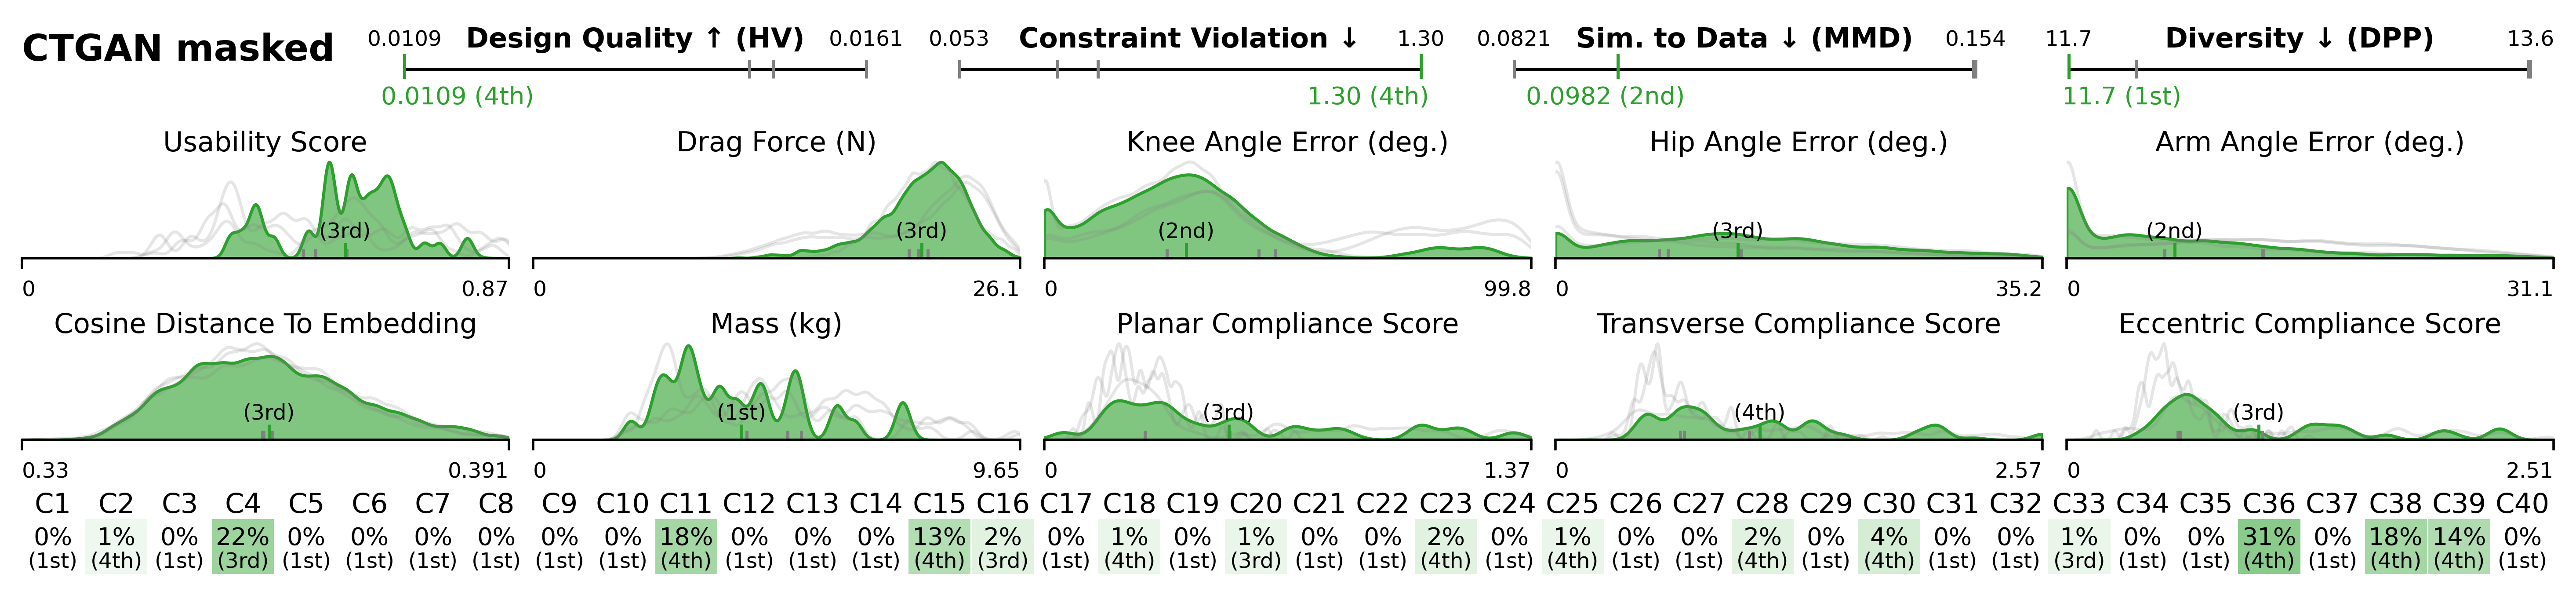

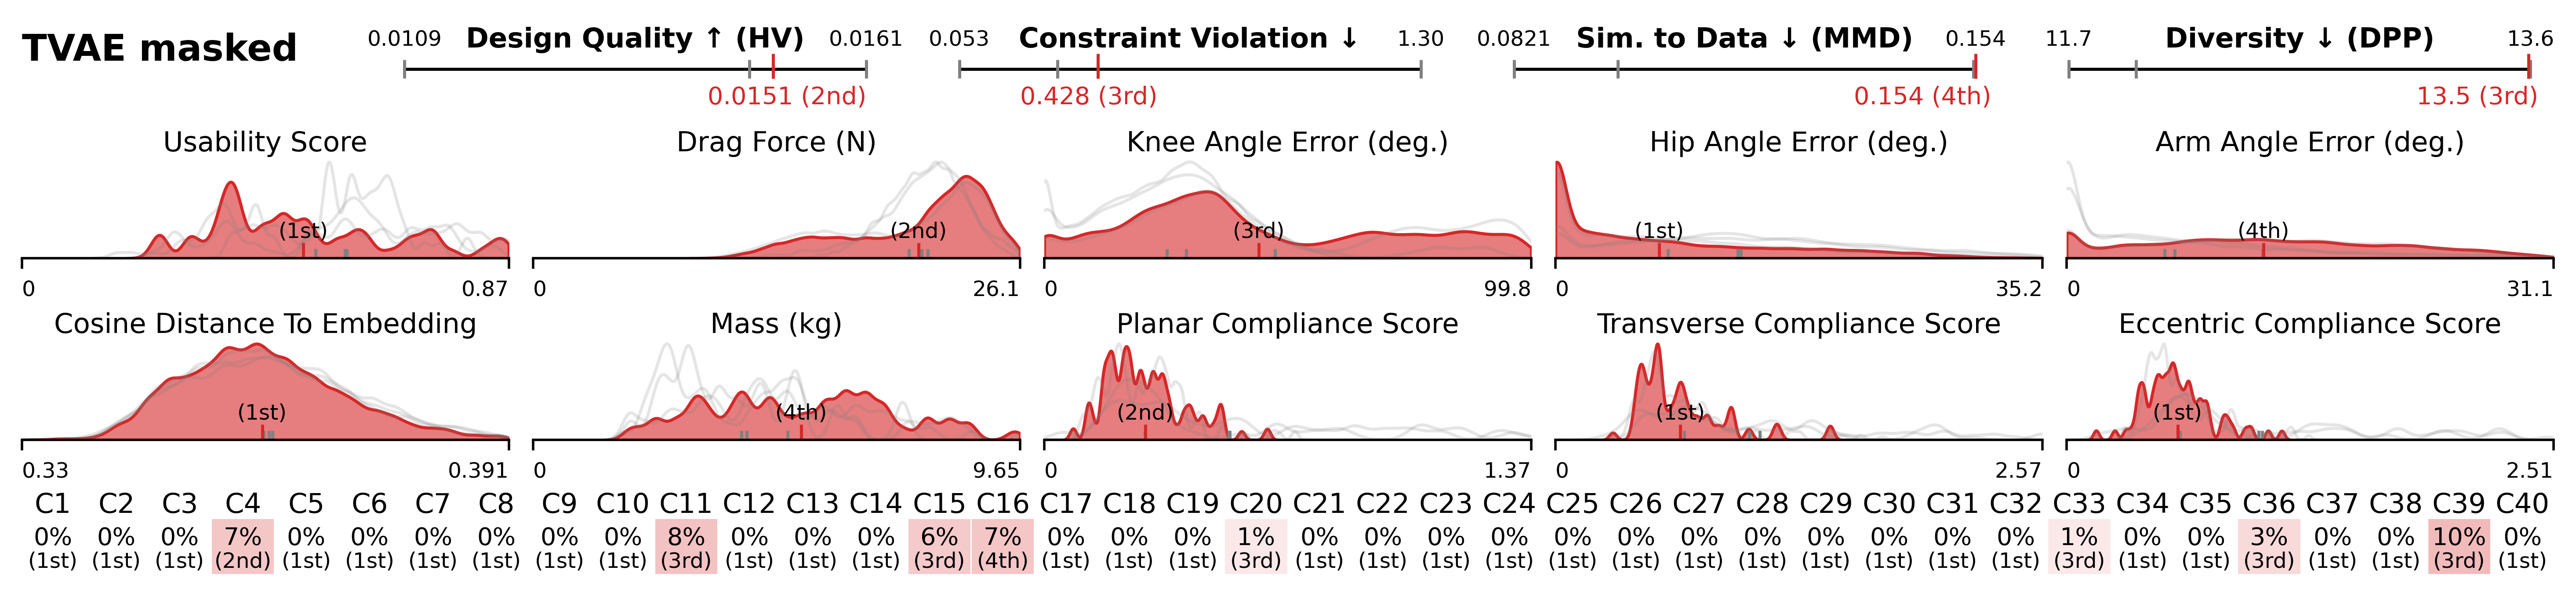

Model 'Dataset masked' not found in dashboard data. Skipping.


In [13]:
filepaths = {
    "CTGAN": "results/benchmark_results/CTGAN_conditional",
    "TVAE": "results/benchmark_results/TVAE_conditional",
    "Dataset": "results/benchmark_results/baseline_dataset_conditional",
    "CTGAN masked": "results/benchmark_results/CTGAN_masked_conditional",
    "TVAE masked": "results/benchmark_results/TVAE_masked_conditional",
    "Dataset masked": "results/benchmark_results/baseline_dataset_masked_conditional"
}

dashboard = ScoreReportDashboard(
    filepaths = filepaths,
)

for m in filepaths.keys():
    dashboard.show_model(m)


Let's run through the unconditional case as well:

In [14]:
for model in ["CTGAN", "TVAE"]:
    for mask_status in ["", "_masked"]:
        benchmarker = Benchmarker(device=device, masked_constraints=("masked" in mask_status), gradient_free=True)
        data = benchmarker.get_train_data(categorical=True)
        metadata = get_metadata(data)
        if model == "CTGAN":
            synthesizer = CTGANSynthesizer.load(filepath=f"results/models/CTGAN.pkl")
        else:
            synthesizer = TVAESynthesizer.load(filepath=f"results/models/TVAE.pkl")
        synthetic_collapsed = synthesizer.sample(num_rows=10000)
        synthetic_cont = benchmarker.convert_df_to_continuous(synthetic_collapsed)
        synthesizer_tens = torch.tensor(synthetic_cont.values, dtype=torch.float32)
        generated_data = get_conditionally_valid_sample(benchmarker, synthesizer_tens)
        main_scores, detailed_scores, all_evaluation_scores = benchmarker.score(generated_data)
        benchmarker.save_results(f"results/benchmark_results/{model}{mask_status}")
        print(f"{model}{mask_status} unconditional scores:")
        print(main_scores)


/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


Evaluation function called after receiving test conditions; logging as unconditional evaluation!


100%|██████████| 100/100 [00:07<00:00, 13.03it/s]
/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


CTGAN unconditional scores:
Design Quality ↑ (HV)      0.008653
Constraint Violation ↓          0.0
Sim. to Data ↓ (MMD)       0.147113
Novelty ↑                 10.669686
Binary Validity ↑               1.0
Diversity ↓ (DPP)          7.096609
Evaluation Count          1000000.0
Conditional?                  False
Masked Constraints?           False
Gradient Free?                 True
dtype: object
Evaluation function called after receiving test conditions; logging as unconditional evaluation!


100%|██████████| 100/100 [00:07<00:00, 12.70it/s]
/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


CTGAN_masked unconditional scores:
Design Quality ↑ (HV)      0.007924
Constraint Violation ↓        1.046
Sim. to Data ↓ (MMD)       0.123304
Novelty ↑                 12.111173
Binary Validity ↑            0.3459
Diversity ↓ (DPP)           9.94108
Evaluation Count          1000000.0
Conditional?                  False
Masked Constraints?            True
Gradient Free?                 True
dtype: object
Evaluation function called after receiving test conditions; logging as unconditional evaluation!


100%|██████████| 100/100 [00:09<00:00, 11.08it/s]
/home/mileva/mambaforge/envs/bike-bench-cuda/lib/python3.10/site-packages/sdv/_utils.py:500: FutureWarning: The 'load' function will be deprecated in future versions of SDV. Please use 'utils.load_synthesizer' instead.
  warnings.warn(


TVAE unconditional scores:
Design Quality ↑ (HV)      0.016016
Constraint Violation ↓          0.0
Sim. to Data ↓ (MMD)       0.163186
Novelty ↑                  6.771376
Binary Validity ↑               1.0
Diversity ↓ (DPP)         13.554192
Evaluation Count          1000000.0
Conditional?                  False
Masked Constraints?           False
Gradient Free?                 True
dtype: object
Evaluation function called after receiving test conditions; logging as unconditional evaluation!


100%|██████████| 100/100 [00:08<00:00, 11.80it/s]


TVAE_masked unconditional scores:
Design Quality ↑ (HV)      0.015026
Constraint Violation ↓       0.6161
Sim. to Data ↓ (MMD)       0.164055
Novelty ↑                  6.812968
Binary Validity ↑            0.6913
Diversity ↓ (DPP)         13.548883
Evaluation Count          1000000.0
Conditional?                  False
Masked Constraints?            True
Gradient Free?                 True
dtype: object


/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/benchmarking/public_benchmarking_utils.py:284: UserWarning: Dataset (uncond) masked: results directory missing (results/benchmark_results/baseline_dataset_masked), skipping.
  warnings.warn(f"{name}: results directory missing ({d}), skipping.")
/home/mileva/Documents/Lyle/Bike-Bench-Internal/src/bikebench/benchmarking/public_benchmarking_utils.py:383: UserWarning: No model_colors provided; using Matplotlib cycle.
  warnings.warn("No model_colors provided; using Matplotlib cycle.")


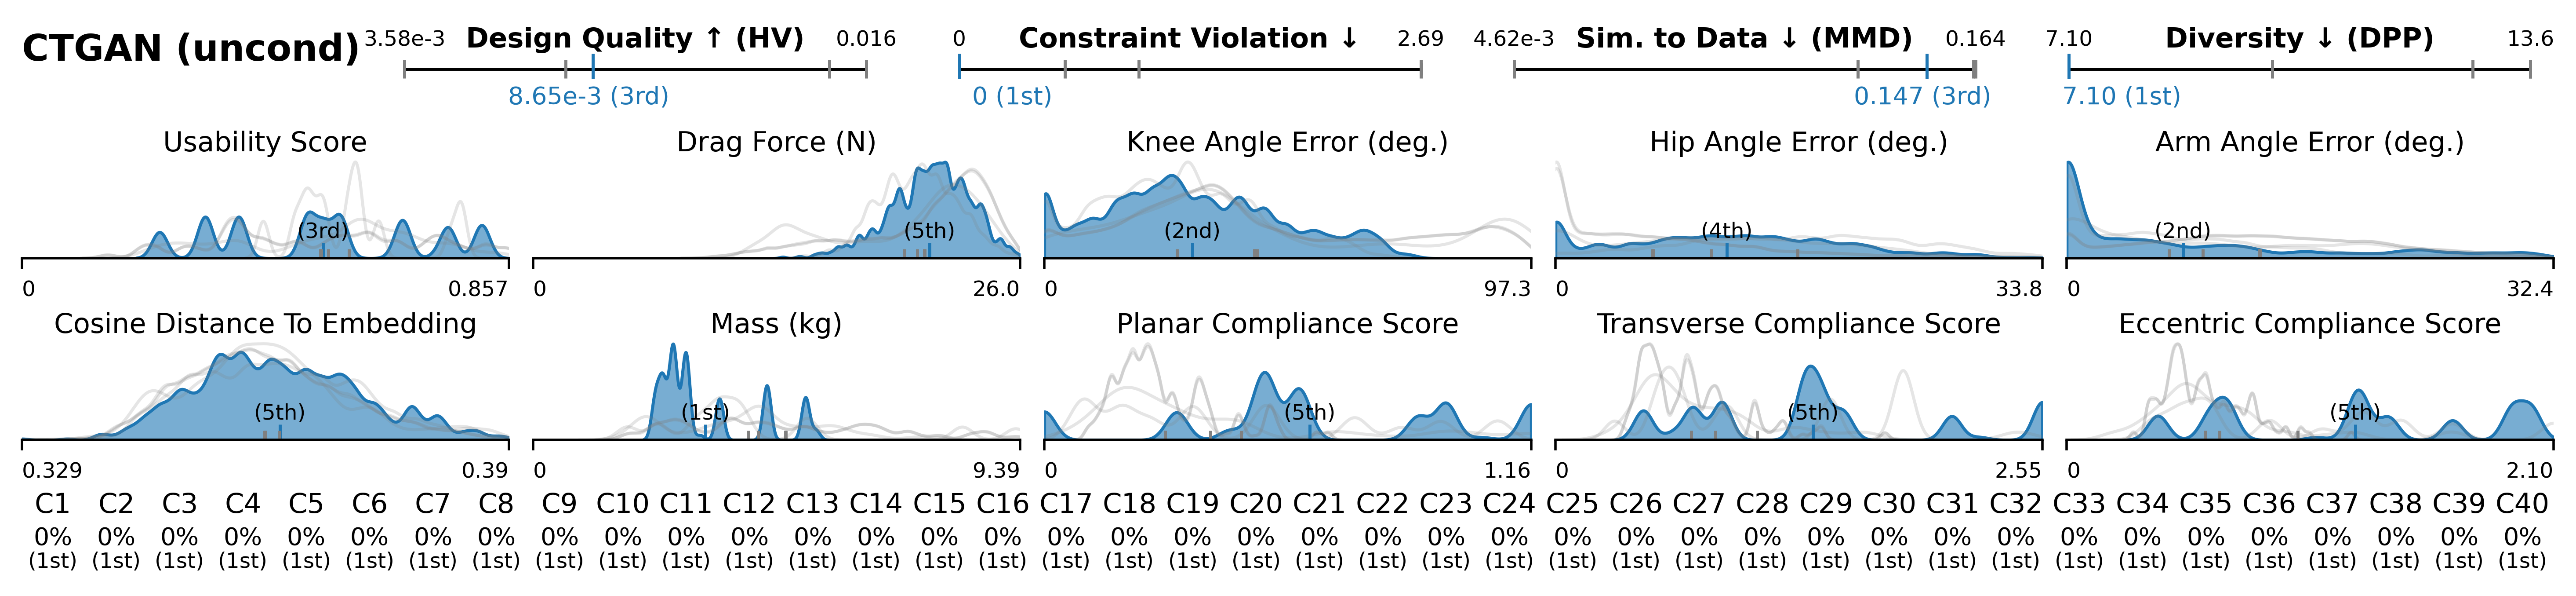

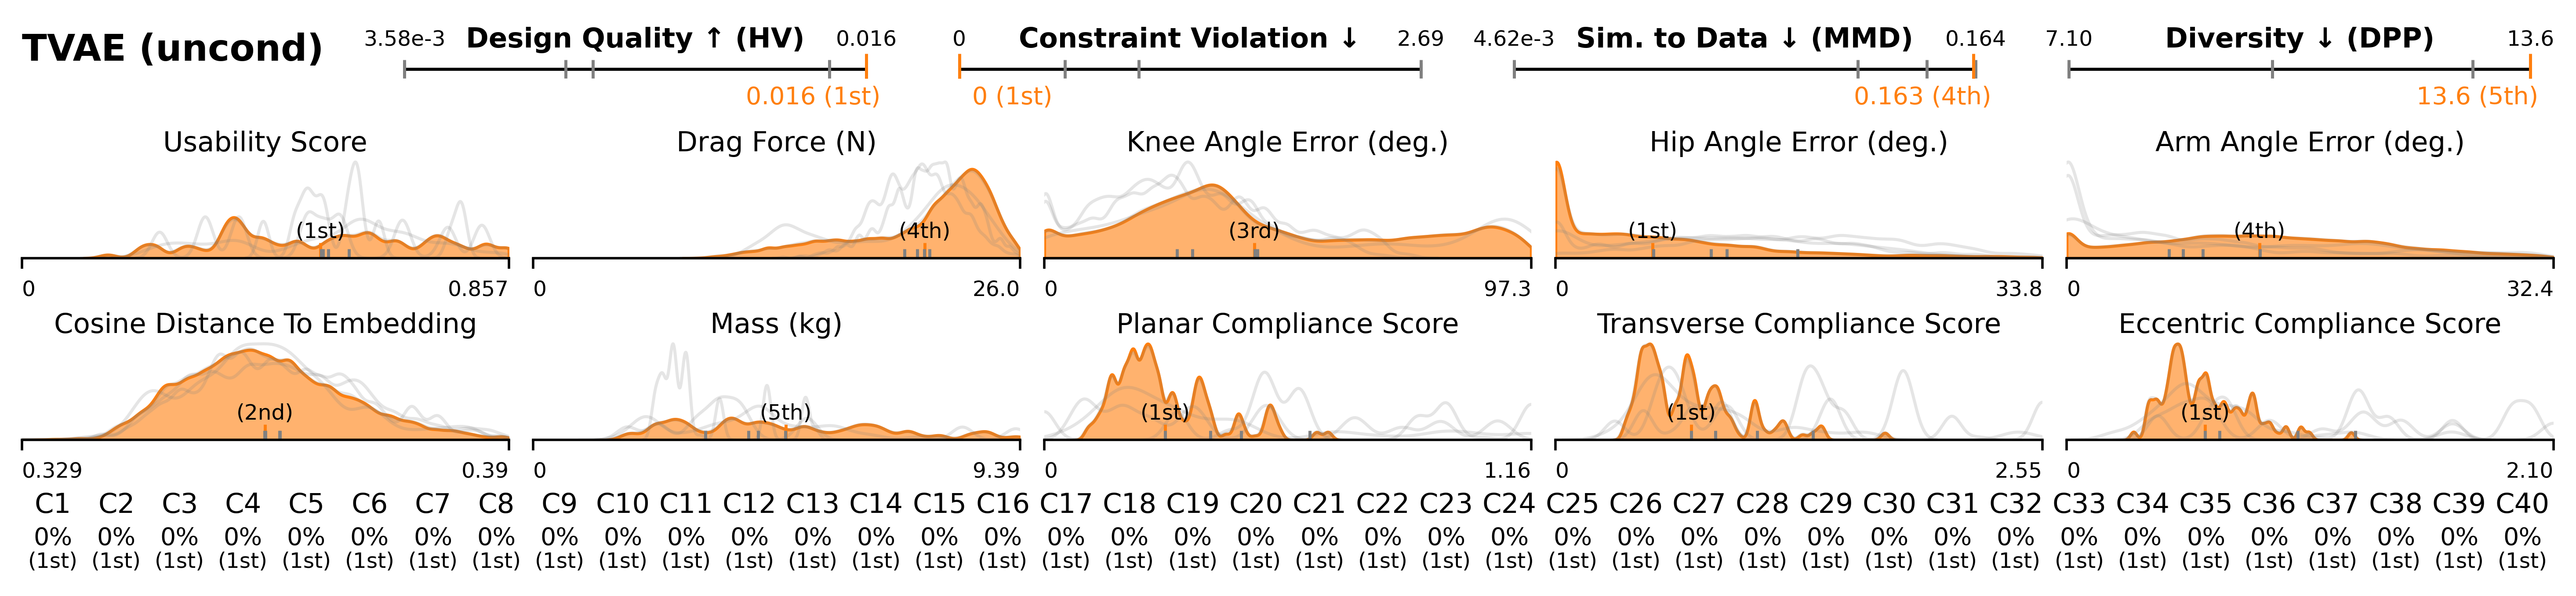

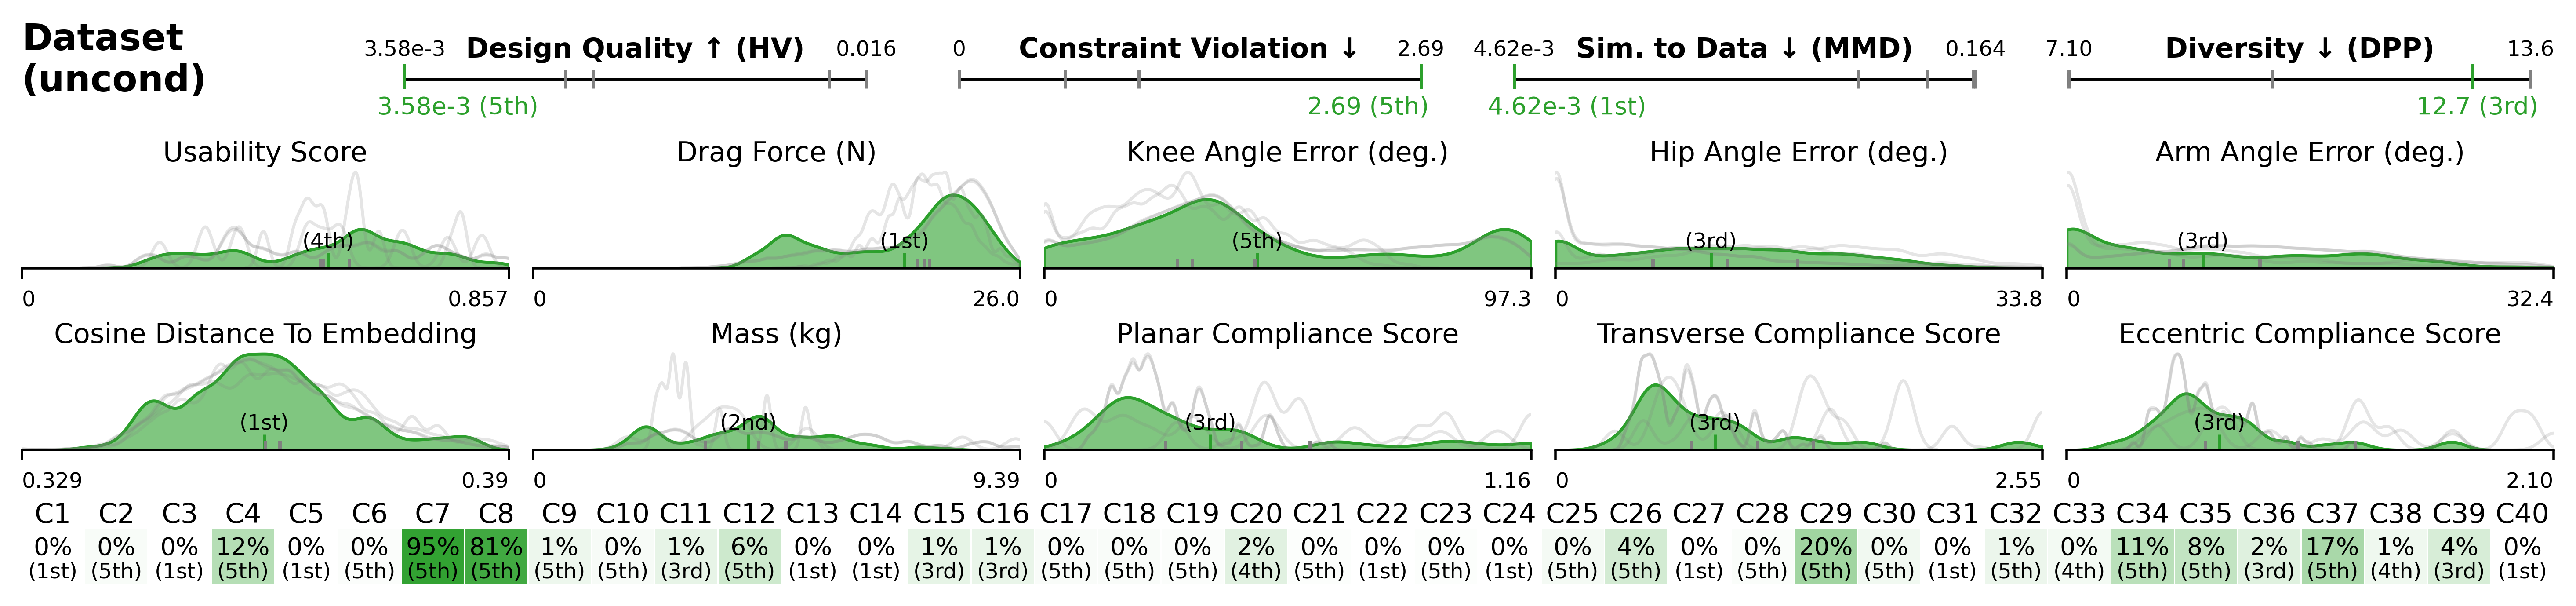

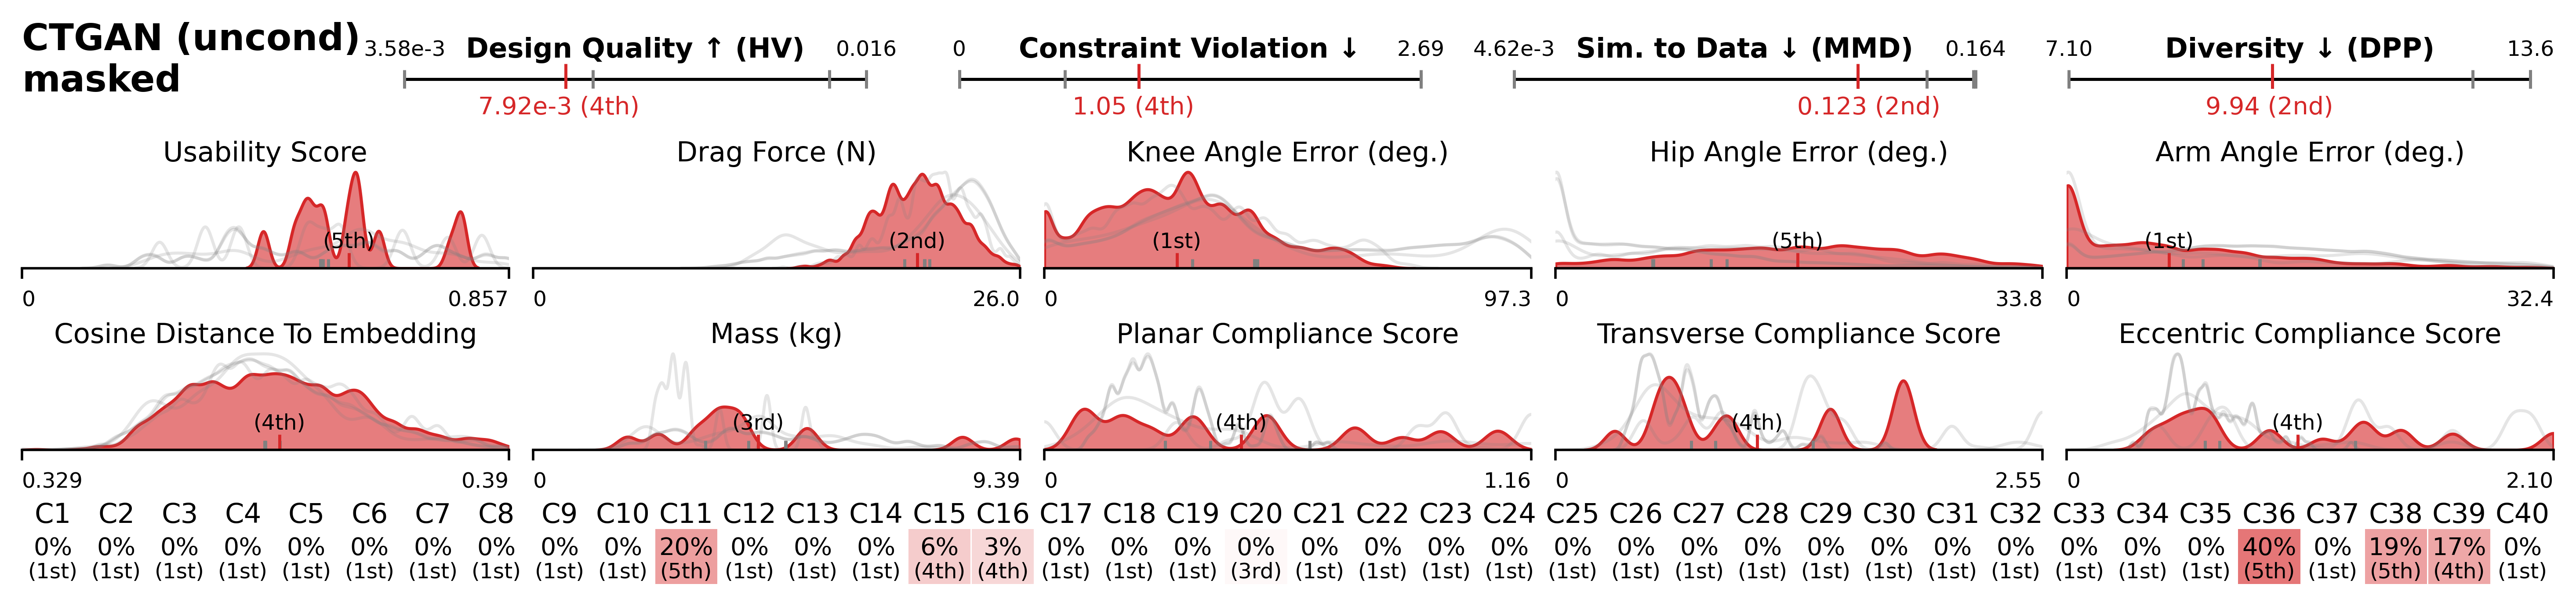

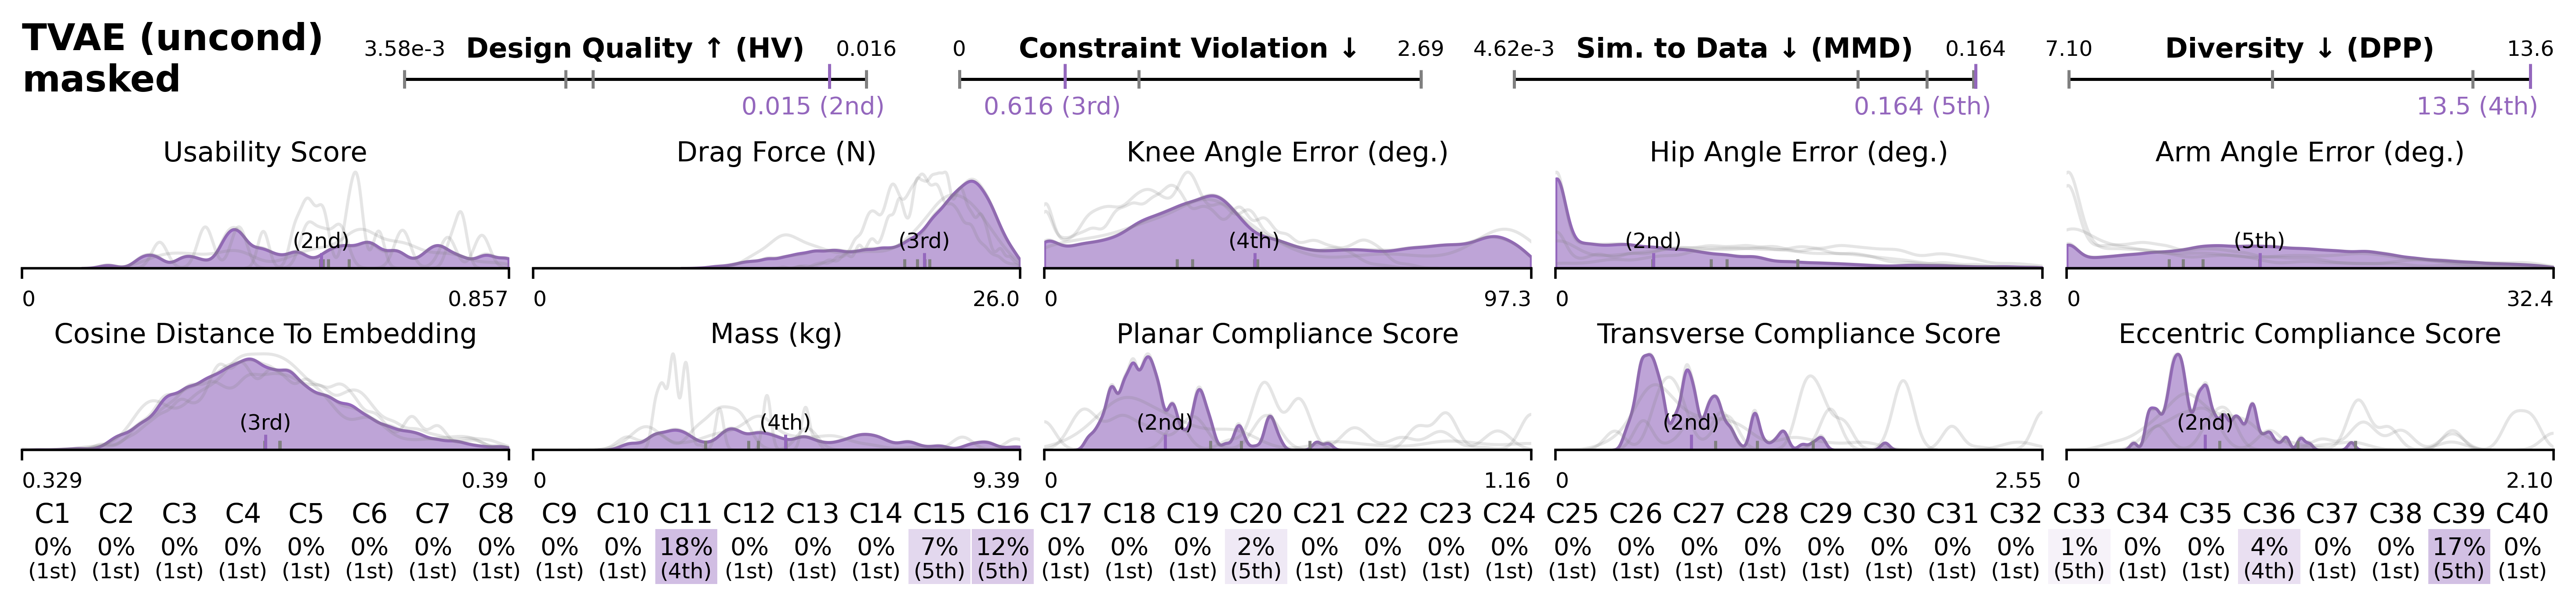

Model 'Dataset (uncond) masked' not found in dashboard data. Skipping.


In [15]:
filepaths_conditional = {
    "CTGAN (uncond)": "results/benchmark_results/CTGAN",
    "TVAE (uncond)": "results/benchmark_results/TVAE",
    "Dataset (uncond)": "results/benchmark_results/baseline_dataset",
    "CTGAN (uncond) masked": "results/benchmark_results/CTGAN_masked",
    "TVAE (uncond) masked": "results/benchmark_results/TVAE_masked",
    "Dataset (uncond) masked": "results/benchmark_results/baseline_dataset_masked"
}
dashboard_conditional = ScoreReportDashboard(
    filepaths = filepaths_conditional,
)
for m in filepaths_conditional.keys():
    dashboard_conditional.show_model(m)
    